# Tópico 4 - Atividade: Filtro passa-baixas e estimação de ordem

## Aluno
João Mário C. I. Lago

# Installs & Imports

In [35]:
!pip install -q numpy matplotlib scipy

In [36]:
import json
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
from scipy import signal

import IPython.display as ipd
from IPython.display import display, Markdown

# Utils

In [37]:
def plot_filter_fft(x_before, x_after, fs, title):
    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'FFT Analysis - {title}', fontsize=16)

    # FFT before filter
    f_before = np.fft.fft(x_before)
    N = len(f_before)
    freq_axis = np.fft.fftfreq(N, 1/fs)[:N//2]

    # Magnitude before filter
    mag_before = np.abs(f_before)[:N//2] / np.abs(f_before).max()
    ax1.plot(freq_axis, mag_before)
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Normalized Magnitude')
    ax1.set_title('Magnitude - Before Filter')
    ax1.set_xlim(0, 20000)  # Zoom to max 20kHz
    ax1.grid(True)

    # Phase before filter
    phase_before = np.angle(f_before)[:N//2]
    ax2.plot(freq_axis, phase_before)
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Phase (radians)')
    ax2.set_title('Phase - Before Filter')
    ax2.set_xlim(0, 20000)  # Zoom to max 20kHz
    ax2.grid(True)

    # FFT after filter
    f_after = np.fft.fft(x_after)
    N = len(f_after)
    freq_axis = np.fft.fftfreq(N, 1/fs)[:N//2]

    # Magnitude after filter
    mag_after = np.abs(f_after)[:N//2] / np.abs(f_after).max()
    ax3.plot(freq_axis, mag_after)
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_ylabel('Normalized Magnitude')
    ax3.set_title('Magnitude - After Filter')
    ax3.set_xlim(0, 20000)  # Zoom to max 20kHz
    ax3.grid(True)

    # Phase after filter
    phase_after = np.angle(f_after)[:N//2]
    ax4.plot(freq_axis, phase_after)
    ax4.set_xlabel('Frequency (Hz)')
    ax4.set_ylabel('Phase (radians)')
    ax4.set_title('Phase - After Filter')
    ax4.set_xlim(0, 20000)  # Zoom to max 20kHz
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

# Contexto

Após fazer uma gravação para uma aula, um professor notou um bip intermitente no áudio.

Para retirar este ruído, aplique um filtro passa-baixas:

# 1) Verifique a frequência do bip (no Ocenaudio) e projete um filtro passa-baixas FIR pelo método do janelamento de forma que este bip seja retirado sem modificar demasiadamente o áudio original.

## Espectrograma do áudio (Ocenaudio)

<div style="display: flex; justify-content: center;">
    <img src="./assets/beep_spectral.png" alt="Beep" height="500">
</div>

É possivel observar que existe um beep na frequência de 8kHz.

## Filtro passa-baixas FIR (pyFDA)

Utilizando o pyFDA, foi projetado um filtro passa-baixas FIR com a seguinte especificação:

### Parâmetros de design do filtro

<div style="display: flex; justify-content: center;">
    <img src="./assets/pyfda_fir_specs.png" alt="FIR Specs" height="500">
</div>

### Resposta em frequência (Teórica)

<div style="display: flex; justify-content: center;">
    <img src="./assets/pyfda_fir_bode.png" alt="FIR Bode" height="500">
</div>

## Aplicando o filtro FIR no áudio contendo o beep

/tmp/ipykernel_34943/686601144.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wavfile.read("./assets/fala-tom-alta-freq.wav")


### FIR filter coefficients:

| Index | B | A |
|-------|---|---|
| 0 | 0.000214119 | 1 |
| 1 | -0.000408801 | 0 |
| 2 | -0.000739381 | 0 |
| 3 | -0.000431738 | 0 |
| 4 | 0.00038948 | 0 |
| 5 | 0.00107876 | 0 |
| 6 | 0.000887888 | 0 |
| 7 | -0.000313013 | 0 |
| 8 | -0.00163999 | 0 |
| 9 | -0.00172794 | 0 |
| 10 | -1.59157e-05 | 0 |
| 11 | 0.00233567 | 0 |
| 12 | 0.00306234 | 0 |
| 13 | 0.000838361 | 0 |
| 14 | -0.00298638 | 0 |
| 15 | -0.0049415 | 0 |
| 16 | -0.00242332 | 0 |
| 17 | 0.0033171 | 0 |
| 18 | 0.0073386 | 0 |
| 19 | 0.00505706 | 0 |
| 20 | -0.00295234 | 0 |
| 21 | -0.0101437 | 0 |
| 22 | -0.00905688 | 0 |
| 23 | 0.00139035 | 0 |
| 24 | 0.0131708 | 0 |
| 25 | 0.014847 | 0 |
| 26 | 0.00209534 | 0 |
| 27 | -0.0161774 | 0 |
| 28 | -0.0232053 | 0 |
| 29 | -0.00879351 | 0 |
| 30 | 0.0188941 | 0 |
| 31 | 0.0361013 | 0 |
| 32 | 0.0218512 | 0 |
| 33 | -0.0210595 | 0 |
| 34 | -0.0605547 | 0 |
| 35 | -0.0535294 | 0 |
| 36 | 0.0224554 | 0 |
| 37 | 0.147078 | 0 |
| 38 | 0.263348 | 0 |
| 39 | 0.310699 | 0 |
| 40 | 0.263348 | 0 |
| 41 | 0.147078 | 0 |
| 42 | 0.0224554 | 0 |
| 43 | -0.0535294 | 0 |
| 44 | -0.0605547 | 0 |
| 45 | -0.0210595 | 0 |
| 46 | 0.0218512 | 0 |
| 47 | 0.0361013 | 0 |
| 48 | 0.0188941 | 0 |
| 49 | -0.00879351 | 0 |
| 50 | -0.0232053 | 0 |
| 51 | -0.0161774 | 0 |
| 52 | 0.00209534 | 0 |
| 53 | 0.014847 | 0 |
| 54 | 0.0131708 | 0 |
| 55 | 0.00139035 | 0 |
| 56 | -0.00905688 | 0 |
| 57 | -0.0101437 | 0 |
| 58 | -0.00295234 | 0 |
| 59 | 0.00505706 | 0 |
| 60 | 0.0073386 | 0 |
| 61 | 0.0033171 | 0 |
| 62 | -0.00242332 | 0 |
| 63 | -0.0049415 | 0 |
| 64 | -0.00298638 | 0 |
| 65 | 0.000838361 | 0 |
| 66 | 0.00306234 | 0 |
| 67 | 0.00233567 | 0 |
| 68 | -1.59157e-05 | 0 |
| 69 | -0.00172794 | 0 |
| 70 | -0.00163999 | 0 |
| 71 | -0.000313013 | 0 |
| 72 | 0.000887888 | 0 |
| 73 | 0.00107876 | 0 |
| 74 | 0.00038948 | 0 |
| 75 | -0.000431738 | 0 |
| 76 | -0.000739381 | 0 |
| 77 | -0.000408801 | 0 |
| 78 | 0.000214119 | 0 |


### Original audio:

### Filtered audio:

### FFT analysis:

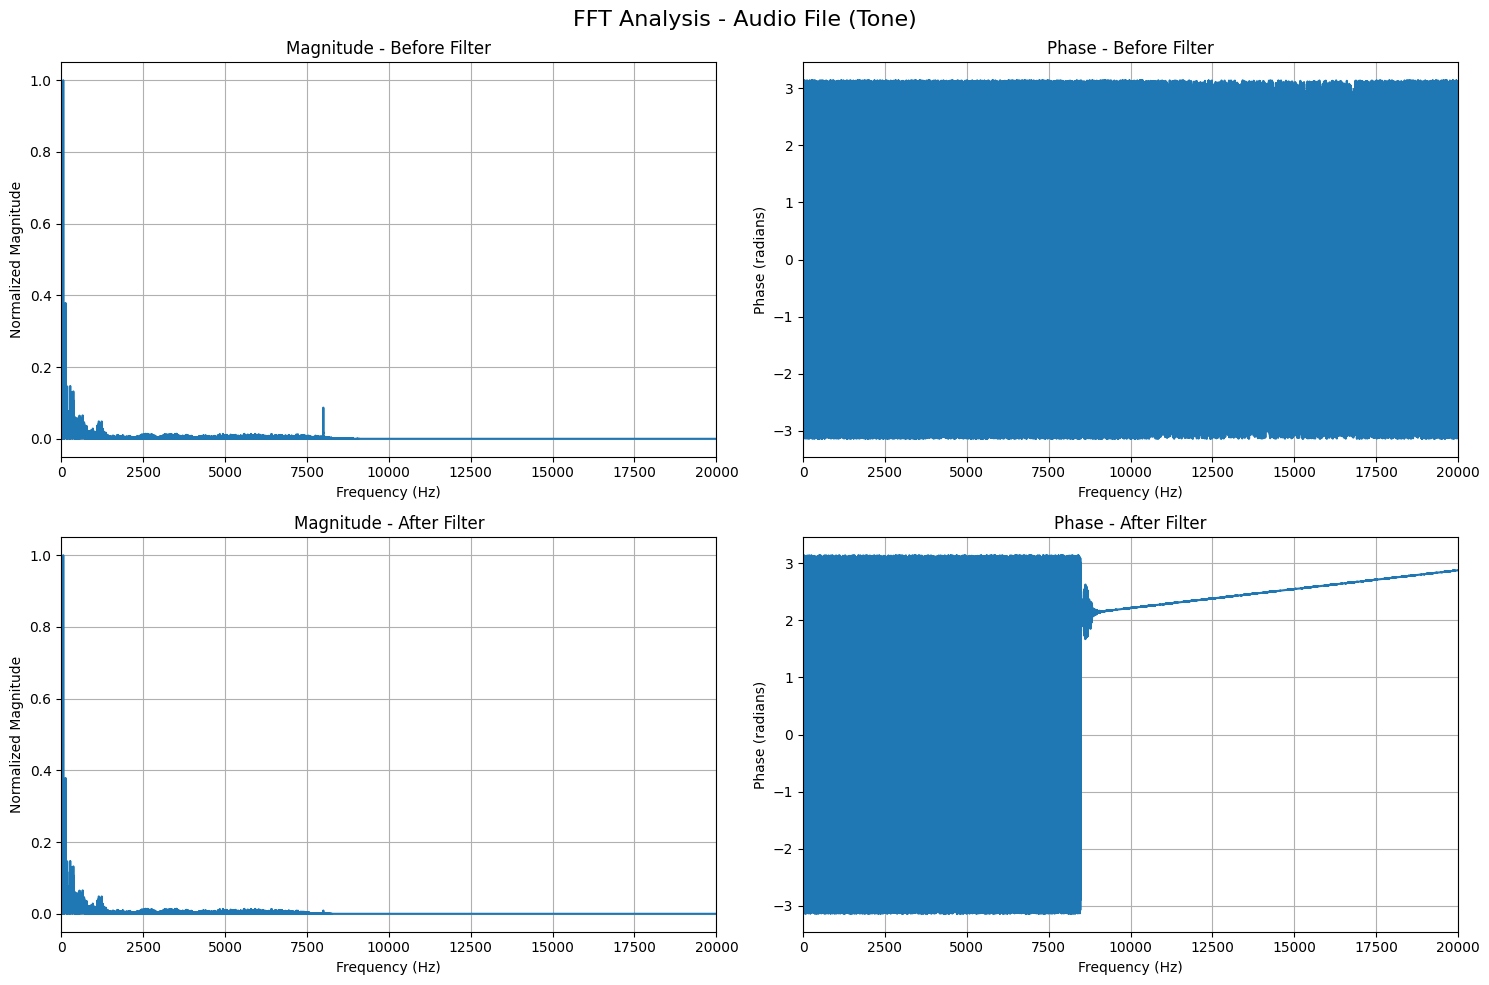

In [38]:
# Read audio file
fs, x = wavfile.read("./assets/fala-tom-alta-freq.wav")

# Load FIR filter project from pyFDA json
with open("./assets/pyfda-fir-specs.json", "r") as f:
    fir_project = json.load(f)
    # Extract b and a coefficients
    [b, a] = fir_project["ba"]
    # Extract sampling frequency
    fir_fs = int(fir_project["f_s_scale"] * fir_project["f_S"])

# Check FS matches
assert fs == fir_fs, "Loaded audio and FIR filter have different sampling frequencies"

# Print a markdown table with the b and a coefficients
table = "### FIR filter coefficients:\n\n"
table += "| Index | B | A |\n"
table += "|-------|---|---|\n"
for i, (b_i, a_i) in enumerate(zip(b, a)):
    table += f"| {i} | {b_i:.6g} | {a_i:.6g} |\n"

# Display
display(Markdown(table))

# Allow play original audio
display(Markdown("### Original audio:"))
display(ipd.Audio(x, rate=fs))

y = signal.lfilter(b, a, x)
# Normalize Y
y = y / np.abs(y).max()

# Allow play filtered audio
display(Markdown("### Filtered audio:"))
display(ipd.Audio(y, rate=fs))

# Plot FFT analysis using the new function
display(Markdown("### FFT analysis:"))
plot_filter_fft(x, y, fs, "Audio File (Tone)")

# Save wav normalized
wavfile.write("./generated/fala-tom-alta-freq-filtered.wav", fs, y)

### Espectrograma do áudio após o filtro FIR (Ocenaudio)

<div style="display: flex; justify-content: center;">
    <img src="./assets/beep_spectral_filtered.png" alt="FIR Filtered Audio" height="500">
</div>

É possivel observar que ainda existe uma pequena linha horizontal na frequência de 8kHz, porém está muito menos intensa que o original. Isso pode ser observado com melhor escala na FFT da imagem acima, onde pode-se observar que a energia da frequência de 8kHz é relativamente mais baixa que o áudio original.
Caso deseje-se remover completamente o beep, poderia ser utilizado um filtro com uma frequência de corte mais baixa que a utilizada no projeto, ou aumentar o decaimento da resposta em frequência do filtro, porém isso pode aumentar o número de coeficientes do filtro significativamente.

# 2) Aplique um ruído branco E um sinal de varredura (20 a 20 kHz) para verificar o correto funcionamento e características do filtro de acordo com o projeto. Cuidado com ajuste das amplitudes, principalmente para não saturar o filtro.

### Original White Noise:

### Filtered White Noise:

### FFT analysis of White Noise:

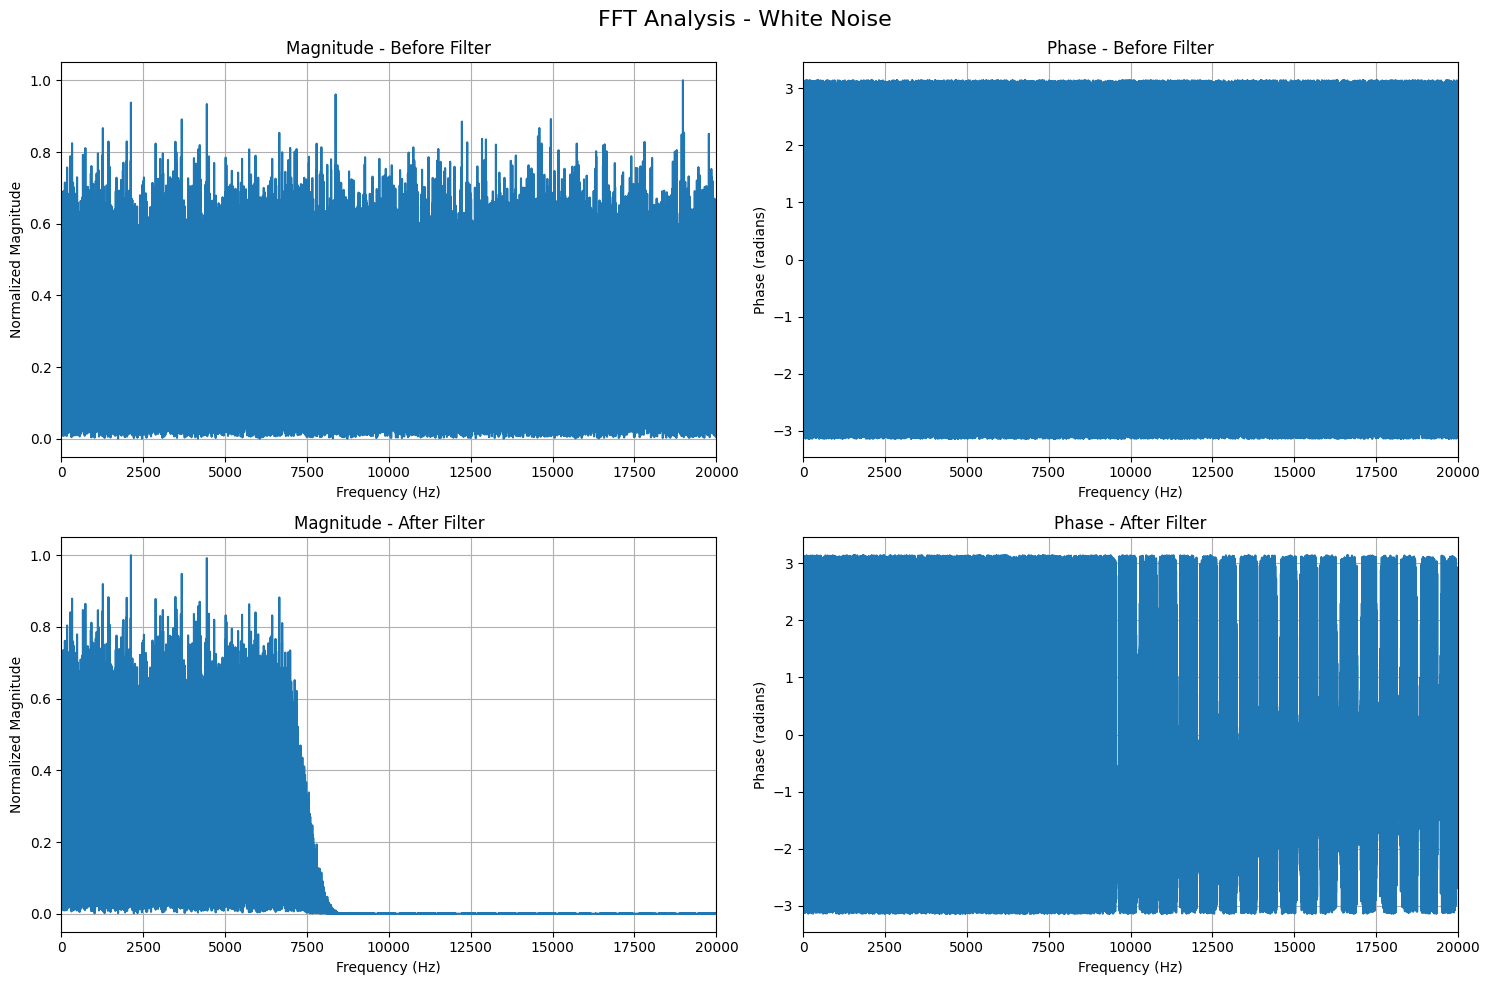

In [39]:
# Generates a white noise signal and applies a FIR filter
fs = 48000
t = np.linspace(0, 10, fs * 10)
x = np.random.randn(fs * 10)

y = signal.lfilter(b, a, x)

display(Markdown("### Original White Noise:"))
display(ipd.Audio(x, rate=fs))

# Allow play filtered audio
display(Markdown("### Filtered White Noise:"))
display(ipd.Audio(y, rate=fs))

# Plot FFT analysis using the new function
display(Markdown("### FFT analysis of White Noise:"))
plot_filter_fft(x, y, fs, "White Noise")

### Original Chirp Signal:

### Filtered Chirp Signal:

### FFT analysis of Chirp Signal:

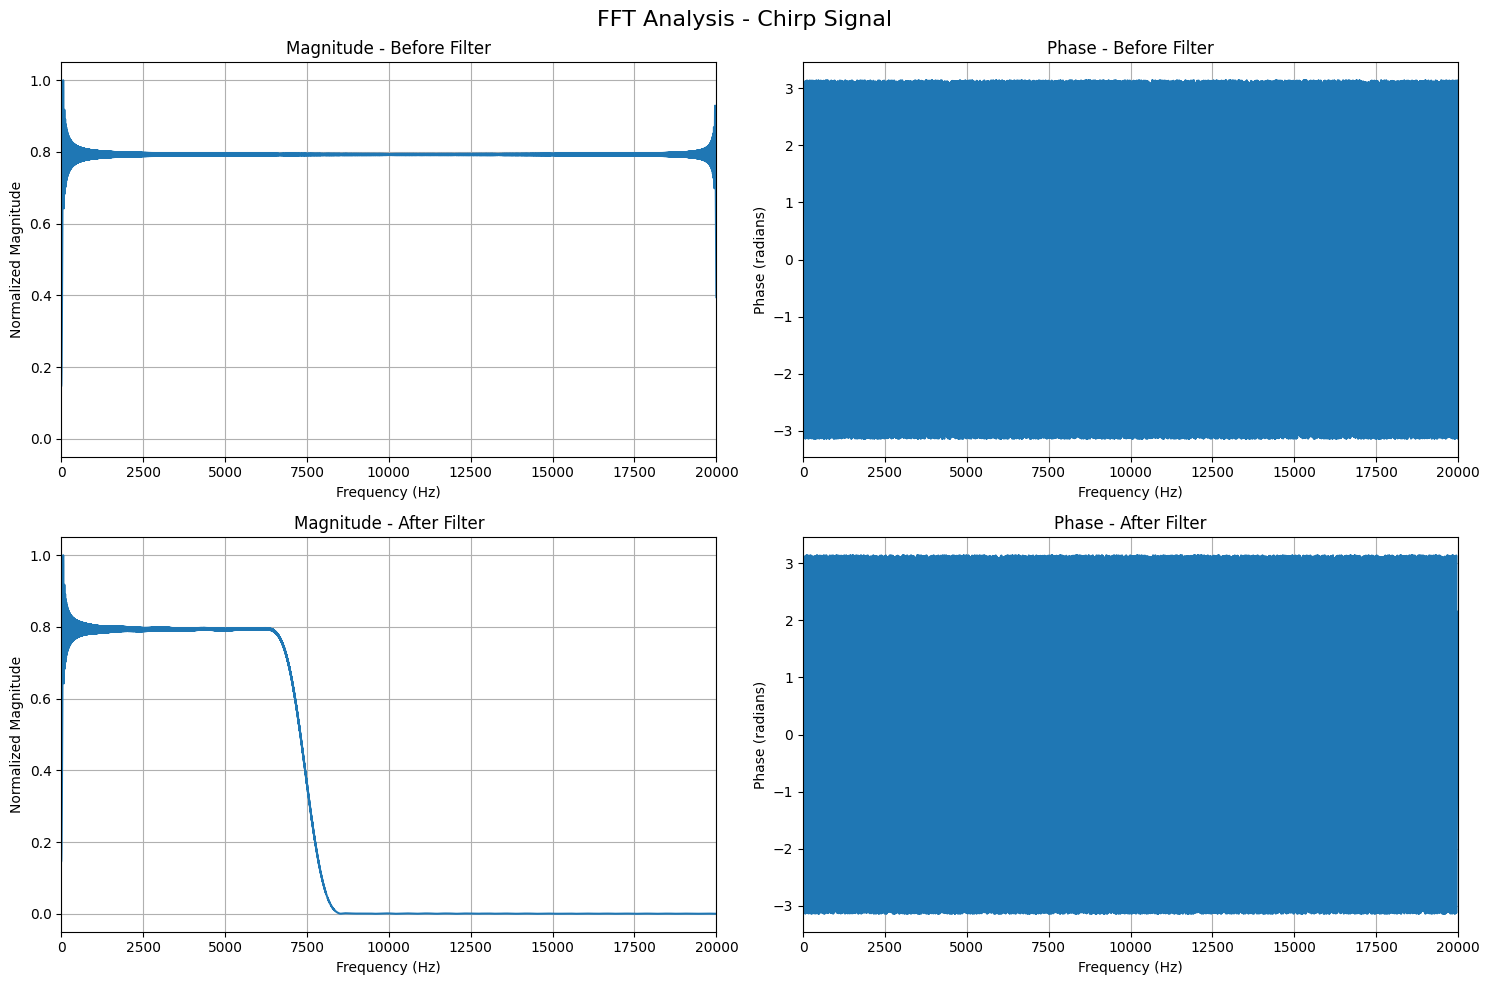

In [40]:
# Sweep containing all frequencies from 20 Hz to 20 kHz
fs = 48000
t = np.linspace(0, 10, fs * 10)
x = signal.chirp(t, 20, 10, 20000, method="linear")

y = signal.lfilter(b, a, x)

display(Markdown("### Original Chirp Signal:"))
display(ipd.Audio(x, rate=fs))

# Allow play filtered audio
display(Markdown("### Filtered Chirp Signal:"))
display(ipd.Audio(y, rate=fs))

# Plot FFT analysis using the new function
display(Markdown("### FFT analysis of Chirp Signal:"))
plot_filter_fft(x, y, fs, "Chirp Signal")